# Binary logistic regression
> A tutorial of fastpages for Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [2]:
# will run in python 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic regression (binary class) with 5-fold cross validation

1. We will use 5-fold cross validation
2. We will use cross entropy loss function with sigmoid nonlinearity

In [3]:
# load the data, you may need to cheange the path
path_data = './mydata/FDB-ENS.XLSX'
#df = pd.read_excel(path_data,sheetname='quantum_ensemble_db') # read data using pandas library
df = pd.read_excel(path_data) # read data using pandas library

In [5]:
#print(df)  # print the data
keys = ['F1','F2','F3','F4','F5','Label'] # this is the structure of the data in the file
X1 = np.zeros([df.shape[0],1]) # there are (df.shape[0] =) 800 features in a 5-dimensional space
# covert the data into numpy array
for key in keys:
    X_temp = np.array(df[key])
    X_temp.shape = (X_temp.shape[0],1)
    X1 = np.append(X1,X_temp,axis =1)
X = X1[:,1:-1] # extract only the features (800 x 5), each row represents a feature vector
Y = X1[:,-1:] # extract only labels, (800 x 1)
print('training data-size = {},label data-size = {}'.format(X.shape,Y.shape))

training data-size = (800, 5),label data-size = (800, 1)


In [6]:
K = 5 # use 5-fold cross-validation
fold_samples = int(X.shape[0]/K) # size of each fold
# there are 800 features, each fold is of size 800/5
XX = [] # make a list, each element is a multi-dimensional array containing 160 features, total size of list is 5
YY = [] # corresponding labels, a list each element is (180 x 1) array, there are a total of 5 elements in the list
i = 0
while (i<=X.shape[0]-fold_samples):
    XX.append(X[i:i+fold_samples])
    YY.append(Y[i:i+fold_samples])
    i = i+fold_samples
# sanity check : XX[0].shape, YY[0].shape, each element of the list is numpy array
XX_Org  = XX[:] # make a copy of data, python 2 way
YY_Org  = YY[:]

In [7]:
max_itr = 500 # maximum number of iterations for gradient descent
alpha   = 0.1 

# helper functions
def net_inputV2(theta,x):
    return np.dot(x,theta)

def sigmoidV2(z):
    return 1.0/(1+np.exp(-z))

def gradientV2(theta,x,y):
    m= x.shape[0] # the total number of features
    grad = (1.0)/m*np.dot(x.T,sigmoidV2(net_inputV2(theta,x)).reshape(-1,1)-y.reshape(-1,1))
    return grad

def probabilityV2(theta,x):
    return sigmoidV2(net_inputV2(theta,x))

def cost_functionV2(theta,x,y):
    m = x.shape[0]
    total_cost = -(1.0/m) * np.sum(y * np.log(probabilityV2(theta,x))+(1-y)*np.log(1-probabilityV2(theta,x)))    
    return total_cost

def computeAccV2(theta,x,y):
    pred_y = 1*[sigmoidV2(net_inputV2(theta,x))>0.5 for x in x]
    acc = np.mean(y==pred_y)*100.0
    return acc        




Accuracy mean = 79.0%, Accuracy variance = 1.8791620472966135


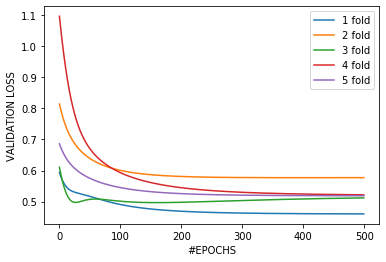

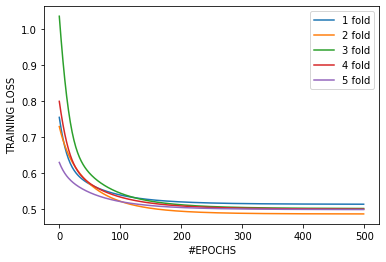

In [8]:
all_costs     = [] # training loss
all_acc       = [] # accuracy on the test data
all_val_costs = [] # validation loss
# main logic here
for i in range(K): # loop over the total number of folds
    XTest, YTest  = XX[i], YY[i]
    XX.pop(i) # remove the current fold-data
    YY.pop(i)
    XTrain = XX # keep the data except the current fold
    YTrain = YY
    for i in range(len(XTrain)):
        if i==0:
            XTrainAll = XTrain[i]
            YTrainAll = YTrain[i]
        else:
            XTrainAll = np.vstack((XTrainAll,XTrain[i]))
            YTrainAll = np.vstack((YTrainAll,YTrain[i]))
    # train the model for the current fold and compute accuracy
    XTrainAll = np.insert(XTrainAll.astype(float),0,1,axis=1)
    XTest     = np.insert(XTest.astype(float),0,1,axis=1)
    costs     = np.zeros(max_itr)     # training loss
    val_costs = np.zeros(max_itr) # validation loss
    theta     = np.random.rand(XTrainAll.shape[1]).reshape(-1,1) # initialize weights(or model parameters)
    # optimize the model parameters using Gradient descent
    for epoch in range(max_itr):
        costs[epoch]     = cost_functionV2(theta,XTrainAll,YTrainAll) # compute training loss    
        val_costs[epoch] = cost_functionV2(theta,XTest,YTest)         # compute validation loss
        #if np.remainder(epoch,50)==0:
            #print("The cost at iteration {}/{} is {}".format(epoch,max_itr,costs[epoch]))
        grad = gradientV2(theta,XTrainAll,YTrainAll)
        theta -=alpha*grad # weight update
    # compute accuracy on the test data
    acc = computeAccV2(theta,XTest,YTest)
    all_costs.append(costs)
    all_val_costs.append(val_costs)
    all_acc.append(acc)
    XX, YY    = XX_Org[:], YY_Org[:] # retain original for the next fold, pop function modifies the data

# overall accuracy: it is the mean of the accuracies for each fold
acc_final = np.mean(all_acc)
print('Accuracy mean = {}%, Accuracy variance = {}'.format(acc_final,np.std(all_acc)))

plt.figure(1)
for i in range(len(all_val_costs)):
    plt.plot(all_val_costs[i],label='%s fold' % (i+1))
plt.legend()
plt.xlabel('#EPOCHS')
plt.ylabel('VALIDATION LOSS')
plt.show()

plt.figure(2)
for i in range(len(all_costs)):
    plt.plot(all_costs[i],label='%s fold' % (i+1))
plt.legend()
plt.xlabel('#EPOCHS')
plt.ylabel('TRAINING LOSS')
plt.show()